In [1]:
# !pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

(Text(0.5, 1.0, 'Input - Blur'), (-0.5, 459.5, 359.5, -0.5))

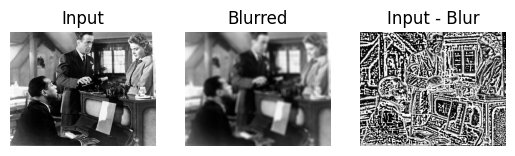

In [4]:
#Step1: Read the input Image
# f = np.zeros([256,256])
# f[0:256,0:128]=255
f = cv2.imread('/home/karthikmsd/sem9/20XW97-CV-LAB/assets/images/casablanca.tif',0)

#Kernel
M=9
h=1/(M*M)*np.ones([M,M])

#Step3: Perform the convolution
g=cv2.filter2D(f,-1,h)

#Step4: Plot the input and output
plt.subplot(1,3,1),plt.imshow(f,cmap='gray')
plt.title('Input'), plt.axis('off')
plt.subplot(1,3,2),plt.imshow(g,cmap='gray')
plt.title('Blurred'), plt.axis('off')
plt.subplot(1,3,3),plt.imshow(f-g,cmap='gray')
plt.title('Input - Blur'), plt.axis('off')

360 460


(Text(0.5, 1.0, 'After HPF'), (-0.5, 459.5, 359.5, -0.5))

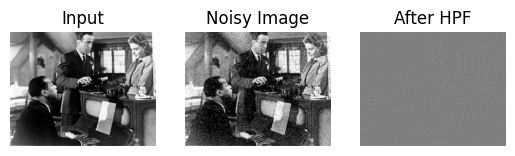

In [6]:
img = cv2.imread('/home/karthikmsd/sem9/20XW97-CV-LAB/assets/images/casablanca.tif',0)
m,n = img.shape
print(m,n)

prob=0.03
thresh = 1-prob
img_noise = np.zeros([m,n]) #Create a template of noise with zeros for the image

#salt and pepper noise
for i in range(0,m):
    for j in range(0,n):
        rnd = np.random.random()
        if rnd<prob:
            img_noise[i][j] = 0
        elif rnd>thresh:
            img_noise[i][j] = 255
        else:
            img_noise[i][j] = img[i][j]

plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.title('Input'),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(img_noise,cmap='gray')
plt.title('Noisy Image'),plt.axis('off')

h=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #HPF
g=cv2.filter2D(img_noise,-1,h)
plt.subplot(1,3,3),plt.imshow(g,cmap='gray')
plt.title('After HPF'),plt.axis('off')

(Text(0.5, 1.0, 'Bicubic'), (-0.5, 799.5, 799.5, -0.5))

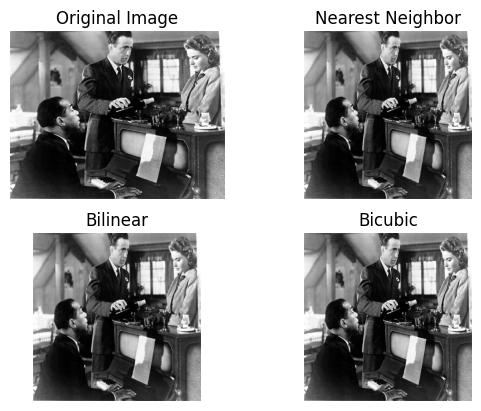

In [7]:
nearest_neighbor_image = cv2.resize(img, (800, 800), interpolation=cv2.INTER_NEAREST) #nearest neighbor interpolation
bilinear_image = cv2.resize(img, (800, 800), interpolation=cv2.INTER_LINEAR) #bilinear interpolation
bicubic_image = cv2.resize(img, (800, 800), interpolation=cv2.INTER_CUBIC) #bicubic interpolation

plt.subplot(2, 2, 1),plt.imshow(img,cmap='gray')
plt.title('Original Image'),plt.axis('off')
plt.subplot(2, 2, 2),plt.imshow(nearest_neighbor_image,cmap='gray')
plt.title('Nearest Neighbor'),plt.axis('off')
plt.subplot(2, 2, 3),plt.imshow(bilinear_image,cmap='gray')
plt.title('Bilinear'),plt.axis('off')
plt.subplot(2, 2, 4),plt.imshow(bicubic_image,cmap='gray')
plt.title('Bicubic'),plt.axis('off')

Text(0.5, 1.0, 'Resized - 512')

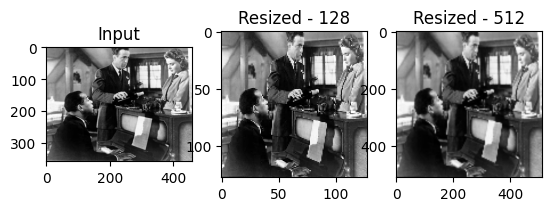

In [8]:
resized_image_128 = cv2.resize(img, (128,128), interpolation=cv2.INTER_LINEAR) # Resize the image to 128x128

resized_image_512 = cv2.resize(resized_image_128, (512,512), interpolation=cv2.INTER_LINEAR) # Resize the image to 512x512

plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.title('Input')
plt.subplot(1,3,2),plt.imshow(resized_image_128,cmap='gray')
plt.title('Resized - 128')
plt.subplot(1,3,3),plt.imshow(resized_image_512,cmap='gray')
plt.title('Resized - 512')

Text(0.5, 1.0, 'Wt. Avg')

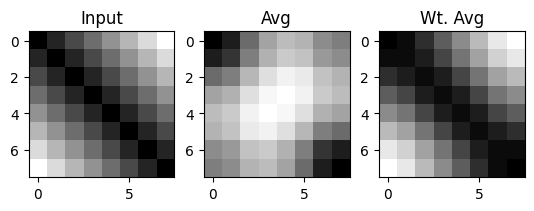

In [9]:
m=8
n=8
img = np.zeros([m,n])

for i in range(0,m):
    for j in range(0,n):
        img[i,j] = abs(i-j)

M=11
h1=1/(M*M)*np.ones([M,M]) #Avg Filter
h2=1/16*np.array([[1,2,1],[2,4,2],[1,2,1]]) #Wt. avg filter

g1=cv2.filter2D(img,-1,h1)
g2=cv2.filter2D(img,-1,h2)

plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.title('Input')
plt.subplot(1,3,2),plt.imshow(g1,cmap='gray')
plt.title('Avg')
plt.subplot(1,3,3),plt.imshow(g2,cmap='gray')
plt.title('Wt. Avg')

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]
 [0 1 2 3 3 3 3 3 3 3 3 3 3 2 1 0]
 [0 1 2 3 4 4 4 4 4 4 4 4 3 2 1 0]
 [0 1 2 3 4 5 5 5 5 5 5 4 3 2 1 0]
 [0 1 2 3 4 5 6 6 6 6 5 4 3 2 1 0]
 [0 1 2 3 4 5 6 7 7 6 5 4 3 2 1 0]
 [0 1 2 3 4 5 6 7 7 6 5 4 3 2 1 0]
 [0 1 2 3 4 5 6 6 6 6 5 4 3 2 1 0]
 [0 1 2 3 4 5 5 5 5 5 5 4 3 2 1 0]
 [0 1 2 3 4 4 4 4 4 4 4 4 3 2 1 0]
 [0 1 2 3 3 3 3 3 3 3 3 3 3 2 1 0]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


Text(0.5, 1.0, 'Concentric Rings Image')

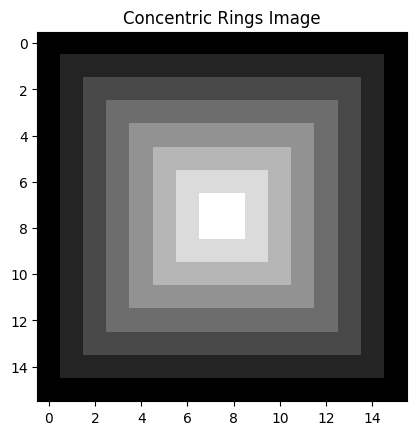

In [10]:
size = 16
image = np.zeros((size, size), dtype=int)
center = size // 2

for k in range(center + 1):
    value = k
    ring_start = k
    ring_end = size - k - 1

    image[ring_start:ring_end+1, ring_start] = value
    image[ring_start:ring_end+1, ring_end] = value
    image[ring_start, ring_start:ring_end+1] = value
    image[ring_end, ring_start:ring_end+1] = value

print(image)
plt.imshow(image, cmap='gray')
plt.title('Concentric Rings Image')